In [369]:
import pandas as pd
import numpy as np


In [370]:
gr_data = pd.read_csv('./1. Original_df/GoodReads.Best_Books_Ever 2.csv')

pd.set_option('display.max_columns', 30)
display(gr_data.head(3), gr_data.shape)

,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1E+13,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07-11-1960,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",2269402,23328,NaN


(52478, 23)

#### Standard Column Names


In [371]:
# Names in lower case
cols = []
for c in gr_data.columns:
    cols.append(c.lower())

gr_data.columns = cols
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'bookformat', 'edition', 'pages',
       'publisher', 'publishdate', 'firstpublishdate', 'awards', 'numratings',
       'ratingsbystars', 'likedpercent', 'setting', 'bbescore', 'bbevotes',
       'price'],
      dtype='object')

In [372]:
# Renaming columns
gr_data = gr_data.rename(columns={'bookformat':'book_format',
                                 'publishdate':'publish_date',
                                 'firstpublishdate':'first_publish_date',
                                 'numratings':'num_ratings',
                                 'ratingsbystars':'rating_by_stars',
                                 'likedpercent': 'liked_perc',
                                 'bbescore':'bbe_score',
                                 'bbevotes':'bbe_votes'})

gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'book_format', 'edition', 'pages',
       'publisher', 'publish_date', 'first_publish_date', 'awards',
       'num_ratings', 'rating_by_stars', 'liked_perc', 'setting', 'bbe_score',
       'bbe_votes', 'price'],
      dtype='object')

In [373]:
pd.set_option('display.max_columns', 30)
gr_data.head(1)

,title,series,author,rating,description,language,isbn,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,liked_perc,setting,bbe_score,bbe_votes,price
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09


In [374]:
gr_data.dtypes 

title                  object
series                 object
author                 object
rating                float64
description            object
language               object
isbn                   object
genres                 object
characters             object
book_format            object
edition                object
pages                  object
publisher              object
publish_date           object
first_publish_date     object
awards                 object
num_ratings             int64
rating_by_stars        object
liked_perc            float64
setting                object
bbe_score               int64
bbe_votes               int64
price                  object
dtype: object

In [375]:
#publish_date first_publish_date #
# Converting object columns to numerical
gr_data['pages'] = pd.to_numeric(gr_data['pages'], errors = 'coerce')
gr_data['price'] = pd.to_numeric(gr_data['price'], errors = 'coerce')

# Converting object columns to datetime
#gr_data['publish_date'] = pd.to_datetime(gr_data['publish_date'])
#gr_data['first_publish_date'] = pd.to_datetime(gr_data['first_publish_date'])


##### Dealing with each column

In [376]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'book_format', 'edition', 'pages',
       'publisher', 'publish_date', 'first_publish_date', 'awards',
       'num_ratings', 'rating_by_stars', 'liked_perc', 'setting', 'bbe_score',
       'bbe_votes', 'price'],
      dtype='object')

###### Author

In [377]:
gr_data['author'].head(50)

0                                       Suzanne Collins
1             J.K. Rowling, Mary GrandPré (Illustrator)
2                                            Harper Lee
3             Jane Austen, Anna Quindlen (Introduction)
4                                       Stephenie Meyer
5                       Markus Zusak (Goodreads Author)
6     George Orwell, Russell Baker (Preface), C.M. W...
7              C.S. Lewis, Pauline Baynes (Illustrator)
8                                        J.R.R. Tolkien
9                                     Margaret Mitchell
10                        John Green (Goodreads Author)
11                                        Douglas Adams
12                                     Shel Silverstein
13    Emily Brontë, Richard J. Dunn (Editor), David ...
14                         Dan Brown (Goodreads Author)
15                                        Arthur Golden
16        Oscar Wilde, Jeffrey Eugenides (Introduction)
17    Lewis Carroll, John Tenniel (Illustrator),

In [378]:
import re

# extract author name and collaborators
gr_data['author'] = gr_data['author'].astype(str)
gr_data['other_collabs'] = gr_data['author'].apply(lambda x: ', '.join(re.split(',|\(|:', x)[1:]).strip())
gr_data['author'] = gr_data['author'].apply(lambda x: re.split(',|\(|:', x)[0].strip())


In [379]:
gr_data['author'].head(50)

0              Suzanne Collins
1                 J.K. Rowling
2                   Harper Lee
3                  Jane Austen
4              Stephenie Meyer
5                 Markus Zusak
6                George Orwell
7                   C.S. Lewis
8               J.R.R. Tolkien
9            Margaret Mitchell
10                  John Green
11               Douglas Adams
12            Shel Silverstein
13                Emily Brontë
14                   Dan Brown
15               Arthur Golden
16                 Oscar Wilde
17               Lewis Carroll
18            Charlotte Brontë
19                 Victor Hugo
20                Ray Bradbury
21               Veronica Roth
22             William Golding
23         William Shakespeare
24                Paulo Coelho
25          Fyodor Dostoyevsky
26             Stephen Chbosky
27         F. Scott Fitzgerald
28             Cassandra Clare
29            Orson Scott Card
30            Kathryn Stockett
31             L.M. Montgomery
32      

In [380]:
gr_data['author'].value_counts()

James Patterson    97
Nora Roberts       94
Stephen King       94
Agatha Christie    84
Erin Hunter        81
                   ..
Adele Westbrook     1
Clara Ng            1
Maria Krüger        1
Scott Thomas        1
Misty Moncur        1
Name: author, Length: 23196, dtype: int64

In [381]:
gr_data['author'].nunique()

23196

In [382]:
gr_data[['author','other_collabs']].head(10)

,author,other_collabs
0,Suzanne Collins,
1,J.K. Rowling,"Mary GrandPré , Illustrator)"
2,Harper Lee,
3,Jane Austen,"Anna Quindlen , Introduction)"
4,Stephenie Meyer,
5,Markus Zusak,Goodreads Author)
6,George Orwell,"Russell Baker , Preface), C.M. Woodhouse , In..."
7,C.S. Lewis,"Pauline Baynes , Illustrator)"
8,J.R.R. Tolkien,
9,Margaret Mitchell,


In [383]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'book_format', 'edition', 'pages',
       'publisher', 'publish_date', 'first_publish_date', 'awards',
       'num_ratings', 'rating_by_stars', 'liked_perc', 'setting', 'bbe_score',
       'bbe_votes', 'price', 'other_collabs'],
      dtype='object')

###### Rating

In [384]:
# Checking Nan Values
gr_data['rating'].isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
52473    False
52474    False
52475    False
52476    False
52477    False
Name: rating, Length: 52478, dtype: bool>

In [385]:
# Minimum rating 0 and maximum 5
gr_data['rating'].describe()

count    52478.000000
mean         4.021878
std          0.367146
min          0.000000
25%          3.820000
50%          4.030000
75%          4.230000
max          5.000000
Name: rating, dtype: float64

In [386]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'book_format', 'edition', 'pages',
       'publisher', 'publish_date', 'first_publish_date', 'awards',
       'num_ratings', 'rating_by_stars', 'liked_perc', 'setting', 'bbe_score',
       'bbe_votes', 'price', 'other_collabs'],
      dtype='object')

###### Description

In [387]:
gr_data['description'].head(20)

0     WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1     There is a door at the end of a silent corrido...
2     The unforgettable novel of a childhood in a sl...
3     Alternate cover edition of ISBN 9780679783268S...
4     About three things I was absolutely positive.\...
5     Librarian's note: An alternate cover edition c...
6     Librarian's note: There is an Alternate Cover ...
7     Journeys to the end of the world, fantastic cr...
8     This four-volume, boxed set contains J.R.R. To...
9     Scarlett O'Hara, the beautiful, spoiled daught...
10    Despite the tumor-shrinking medical miracle th...
11    Seconds before the Earth is demolished to make...
12    "Once there was a tree...and she loved a littl...
13    You can find the redesigned cover of this edit...
14    ISBN 9780307277671 moved to this edition.While...
15    A literary sensation and runaway bestseller, t...
16    Written in his distinctively dazzling manner, ...
17    "I can't explain myself, I'm afraid, sir,"

In [388]:
gr_data['description'][14]

'ISBN 9780307277671 moved to this edition.While in Paris, Harvard symbologist Robert Langdon is awakened by a phone call in the dead of the night. The elderly curator of the Louvre has been murdered inside the museum, his body covered in baffling symbols. As Langdon and gifted French cryptologist Sophie Neveu sort through the bizarre riddles, they are stunned to discover a trail of clues hidden in the works of Leonardo da Vinci—clues visible for all to see and yet ingeniously disguised by the painter.Even more startling, the late curator was involved in the Priory of Sion—a secret society whose members included Sir Isaac Newton, Victor Hugo, and Da Vinci—and he guarded a breathtaking historical secret. Unless Langdon and Neveu can decipher the labyrinthine puzzle—while avoiding the faceless adversary who shadows their every move—the explosive, ancient truth will be lost forever.'

In [389]:
# Checking NaN values (no description)
nan_descr = gr_data[gr_data['description'].isna()]
display(nan_descr.head(3), nan_descr.shape)

,title,series,author,rating,description,language,isbn,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,liked_perc,setting,bbe_score,bbe_votes,price,other_collabs
291,Leaves of Grass,NaN,Walt Whitman,4.12,NaN,English,1E+13,"['Poetry', 'Classics', 'Fiction', 'Literature'...",[],Paperback,NaN,624.0,Simon Schuster,08-01-2006,10/28/92,[],89814,"['40667', '27858', '14878', '4260', '2151']",93.0,"['New York City, New York (United States)', 'W...",43537,591,NaN,
680,Howl and Other Poems,NaN,Allen Ginsberg,4.13,NaN,English,9.78087E+12,"['Poetry', 'Classics', 'Fiction', 'American', ...",[],Hardcover,NaN,56.0,City Lights,01-01-2001,10/28/56,[],93609,"['42231', '29693', '15146', '4295', '2244']",93.0,['United States of America'],11078,157,10.53,"William Carlos Williams , Introduction)"
683,The Book of Mormon: Another Testament of Jesus...,NaN,Joseph Smith Jr.,4.34,NaN,English,9.78097E+12,"['Religion', 'Nonfiction', 'Lds', 'Church', 'S...",[],Paperback,2013 Edition,531.0,The Church of Jesus Christ of Latter-day Saints,10/28/13,03-01-1930,[],75222,"['58923', '2290', '2811', '2934', '8264']",85.0,[],11029,121,2.90,Translator)


(1338, 24)

In [390]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'book_format', 'edition', 'pages',
       'publisher', 'publish_date', 'first_publish_date', 'awards',
       'num_ratings', 'rating_by_stars', 'liked_perc', 'setting', 'bbe_score',
       'bbe_votes', 'price', 'other_collabs'],
      dtype='object')

###### Language

In [391]:
gr_data['language'].unique()

array(['English', 'French', 'German', 'Persian', 'Arabic', nan, 'Spanish',
       'Multiple languages', 'Portuguese', 'Indonesian', 'Turkish',
       'Polish', 'Bulgarian', 'Tamil', 'Japanese', 'Romanian', 'Italian',
       'French, Middle (ca.1400-1600)', 'Norwegian', 'Urdu', 'Dutch',
       'Finnish', 'Marathi', 'Chinese', 'Swedish', 'Icelandic',
       'Malayalam', 'Croatian', 'Estonian', 'Greek, Modern (1453-)',
       'Russian', 'Kurdish', 'Danish', 'Hindi', 'Filipino; Pilipino',
       'Serbian', 'Bengali', 'Malay', 'Catalan; Valencian', 'Czech',
       'Vietnamese', 'Armenian', 'Georgian', 'Kannada', 'Korean',
       'Nepali', 'Slovak', 'Telugu', 'Hungarian',
       'English, Middle (1100-1500)', 'Azerbaijani', 'Farsi',
       'Lithuanian', 'Ukrainian', 'Bokmål, Norwegian; Norwegian Bokmål',
       'Iranian (Other)', 'Faroese', 'Basque', 'Macedonian', 'Maltese',
       'Gujarati', 'Amharic', 'Aromanian; Arumanian; Macedo-Romanian',
       'Assamese', 'Panjabi; Punjabi', 'Albania

In [392]:
gr_data['language'].value_counts()

English                                  42661
Arabic                                    1038
Spanish                                    687
French                                     579
German                                     528
                                         ...  
Aromanian; Arumanian; Macedo-Romanian        1
Basque                                       1
Faroese                                      1
Iranian (Other)                              1
Norwegian Nynorsk; Nynorsk, Norwegian        1
Name: language, Length: 81, dtype: int64

In [393]:
# Checking null values
gr_data['language'].isna().sum()

3806

In [394]:
nan_lang = gr_data[gr_data['language'].isna()]
nan_lang.head()

,title,series,author,rating,description,language,isbn,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,liked_perc,setting,bbe_score,bbe_votes,price,other_collabs
503,Mistress Suffragette,NaN,Diana Forbes,4.34,\n A young woman without prospects at a ball ...,NaN,B06XG3G2TF,"['Fiction', 'Novels', 'Historical Fiction', 'D...",[],Kindle Edition,NaN,333.0,Penmore Press LLC,03-05-2017,NaN,[],7647,"['3553', '3422', '466', '140', '66']",97.0,[],18215,203,NaN,Goodreads Author)
570,Invisible Monsters,NaN,Chuck Palahniuk,3.98,She's a catwalk model who has everything: a bo...,NaN,9.78039E+12,"['Fiction', 'Contemporary', 'Thriller', 'Myste...","['Shannon McFarland', 'Brandy Alexander', 'Evi...",Paperback,NaN,304.0,W. W. Norton Company,05-01-2018,09/17/99,[],128254,"['47150', '45163', '25392', '7675', '2874']",92.0,[],15186,181,6.53,Goodreads Author)
645,House of Sand and Fog,NaN,Andre Dubus III,3.85,In this “page-turner with a beating heart” (Bo...,NaN,9.78039E+12,"['Fiction', 'Contemporary', 'Literary Fiction'...","['Colonel Behrani', 'Kathy Nicolo', 'Sheriff L...",Paperback,NaN,368.0,W. W. Norton Company,10-02-2018,10/28/99,['Los Angeles Times Book Prize Nominee for Fic...,125230,"['38141', '46256', '28560', '8447', '3826']",90.0,['California (United States)'],12262,176,2.86,
703,The Awakening: Fate in Motion,NaN,Suzanne Boisvert,4.31,"Exiled from Earth thousands of years ago, Sar ...",NaN,B07GNSZH8M,"['Contemporary', 'Drama', 'Book Club', 'Fictio...",[],Kindle Edition,NaN,331.0,NaN,09/15/18,NaN,[],6682,"['3045', '3031', '329', '206', '71']",96.0,[],10611,118,NaN,Goodreads Author)
751,"One Fish, Two Fish, Red Fish, Blue Fish",NaN,Dr. Seuss,4.13,One Fish Two Fish Red Fish Blue Fish is a 1960...,NaN,9.78001E+12,"['Childrens', 'Picture Books', 'Fiction', 'Cla...",[],Hardcover,NaN,64.0,Harper Collins Children's Books,10-06-2003,10/28/60,[],165623,"['81438', '41473', '30307', '8407', '3998']",93.0,[],9731,163,NaN,Reader)


In [395]:
# Import 'langid' --> identifying language from 'description' or 'title' column

import langid

# Define the language dictionary
language_dict = {
    'en': 'English',
    'fr': 'French',
    'de': 'German',
    'es': 'Spanish',
    'it': 'Italian',
    'pt': 'Portuguese',
    'nl': 'Dutch',
    'sv': 'Swedish',
    'pl': 'Polish',
    'sl': 'Slovenian',
    'bs': 'Bosnian',
    'hr': 'Croatian',
    'sr': 'Serbian',
    'sq': 'Albanian',
    'mk': 'Macedonian',
    'ro': 'Romanian',
    'da': 'Danish',
    'no': 'Norwegian',
    'fi': 'Finnish',
    'hu': 'Hungarian',
    'et': 'Estonian',
    'lv': 'Latvian',
    'lt': 'Lithuanian',
    'cs': 'Czech',
    'sk': 'Slovak',
    'sl': 'Slovenian',
    'ru': 'Russian'
}

# create a list of unique language values from the dataframe
language_values = gr_data['language'].dropna().unique().tolist()

# iterate through rows where 'language' is nan
for index, row in gr_data[gr_data['language'].isna()].iterrows():
    description = row['description']
    if isinstance(description, str):
        detected_language = langid.classify(description)[0]
        gr_data.at[index, 'language'] = language_dict.get(detected_language, detected_language)
    else:
        title = row['title']
        if isinstance(title, str):
            detected_language = langid.classify(title)[0]
            gr_data.at[index, 'language'] = language_dict.get(detected_language, detected_language)



In [396]:
# Checking conversion worked well
gr_data['language'].isna().sum()

0

In [397]:
gr_data['language'].value_counts()

English                                  46094
Arabic                                    1038
Spanish                                    739
French                                     618
German                                     578
                                         ...  
Iranian (Other)                              1
Azerbaijani                                  1
Kurdish                                      1
French, Middle (ca.1400-1600)                1
Norwegian Nynorsk; Nynorsk, Norwegian        1
Name: language, Length: 103, dtype: int64

In [398]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'book_format', 'edition', 'pages',
       'publisher', 'publish_date', 'first_publish_date', 'awards',
       'num_ratings', 'rating_by_stars', 'liked_perc', 'setting', 'bbe_score',
       'bbe_votes', 'price', 'other_collabs'],
      dtype='object')

###### ISBN

In [399]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'book_format', 'edition', 'pages',
       'publisher', 'publish_date', 'first_publish_date', 'awards',
       'num_ratings', 'rating_by_stars', 'liked_perc', 'setting', 'bbe_score',
       'bbe_votes', 'price', 'other_collabs'],
      dtype='object')

###### Genres

In [400]:
gr_data['genres'].value_counts()

[]                                                                                                                                                 4623
['Fiction']                                                                                                                                         222
['Fantasy']                                                                                                                                         176
['Poetry']                                                                                                                                          165
['Nonfiction']                                                                                                                                      105
                                                                                                                                                   ... 
['Comics', 'Graphic Novels', 'Bande Dessinée', 'Adventure', 'Fiction', 'Graphic Novels C

In [401]:
# Extracting from the sublist each unique genre and counting them
import ast

unique_genres = set()

for genres in gr_data['genres']:
    if isinstance(genres, str):
        genres_list = ast.literal_eval(genres)
        unique_genres.update(genres_list)

print(len(unique_genres))

982


In [402]:
gr_data['genres'][0]

"['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']"

In [403]:
type(gr_data['genres'][0])

str

In [404]:
# Convert string values to list of values
#gr_data['genres'] = gr_data['genres'].apply(lambda x: x.split(','))

In [405]:
#gr_data['genres'][0]

In [406]:
# Check the type of the first value in the 'genres' column
#type(gr_data['genres'][0])

In [407]:
# Define an empty list to store the genres
genres_list = []

# Loop through all rows of genres
for i in range(len(gr_data)):
    # Get the genres for the current row
    genres_row = gr_data['genres'][i]

    # Remove the square brackets and single quotes
    genres_row = genres_row.replace('[','').replace(']','').replace("'",'')

    # Split the row into individual genres
    genres = genres_row.split(',')

    # Loop through each genre in the row
    for genre in genres:
        # Clean up the genre by removing any extra whitespace and converting to title case
        genre = genre.strip().title()
        # Check if the genre is not empty and not already in the genres_list
        if genre and genre not in genres_list:
            # If it contains non-ASCII characters, skip it
            if any(ord(c) > 127 for c in genre):
                continue
            # If it's not in the genres_list, add it
            else:
                genres_list.append(genre)

# Print the final genres list and its length
print(genres_list)
print("\n")
print("Unique genres list: ",len(genres_list))


['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action', 'Magic', 'Childrens', 'Audiobook', 'Middle Grade', 'Classics', 'Science Fiction Fantasy', 'Historical Fiction', 'School', 'Literature', 'Historical', 'Novels', 'Read For School', 'High School', 'Historical Romance', 'Classic Literature', 'Adult', 'Vampires', 'Paranormal', 'Paranormal Romance', 'Supernatural', 'Urban Fantasy', 'War', 'Holocaust', 'World War Ii', 'Books About Books', 'Politics', 'Christian', 'Christian Fiction', 'Epic Fantasy', 'High Fantasy', 'Civil War', 'Contemporary', 'Realistic Fiction', 'Coming Of Age', 'Drama', 'Love', 'Humor', 'Comedy', 'Picture Books', 'Poetry', 'Juvenile', 'Kids', 'Short Stories', 'Gothic', '19Th Century', 'Mystery', 'Thriller', 'Suspense', 'Mystery Thriller', 'Crime', 'Japan', 'Asia', 'Adult Fiction', 'Horror', 'Lgbt', 'British Literature', 'France', 'French Literature', 'Plays', 'Philosophy', 'Spirituality', 'Self

In [408]:
# Convert genres_list to a set to get the unique values
unique_genres = set(genres_list)

# Print the unique genres and their count
print(len(unique_genres))


980


In [409]:
# Frequency
genre_counts = []

for genre in genres_list:
    count = gr_data['genres'].apply(lambda x: genre in x).sum()
    genre_counts.append((genre, count))

genre_counts = sorted(genre_counts, key=lambda x: x[1], reverse=True)

for genre, count in genre_counts:
    print(f"{genre}: {count}")


Fiction: 33615
Adult: 20481
Roman: 16575
Romance: 15793
Fantasy: 15321
Young Adult: 11878
Contemporary: 10713
Literature: 10365
Novels: 9621
Historical: 8954
Nonfiction: 8251
Science: 8126
Mystery: 7782
Historical Fiction: 7666
Audiobook: 7307
Class: 6943
Classics: 6935
Science Fiction: 6610
Adventure: 6455
Paranormal: 6093
Childrens: 5226
Thriller: 5204
Magic: 4817
Humor: 4227
History: 4184
Crime: 3766
Contemporary Romance: 3624
Suspense: 3593
Urban: 3562
Urban Fantasy: 3464
Middle Grade: 3389
Chick Lit: 3358
Science Fiction Fantasy: 3302
Biography: 3227
Supernatural: 3196
Mystery Thriller: 3094
American: 2934
Paranormal Romance: 2912
Horror: 2907
Teen: 2795
Philosophy: 2761
Adult Fiction: 2753
Stories: 2676
Memoir: 2636
School: 2618
Short Stories: 2613
Literary Fiction: 2522
British Literature: 2471
Realistic Fiction: 2449
Drama: 2419
Religion: 2306
New Adult: 2301
War: 2273
Christian: 2121
Erotica: 2027
Vampires: 1947
Graphic Novels: 1829
Politics: 1767
Comics: 1764
Family: 1706
Juv

In [412]:
type(genre_counts)

list

In [416]:
genre_counts[0]

('Fiction', 33615)

In [419]:
# Keeping all genres were count is not 0
genre_counts_filtered = [gc for gc in genre_counts if gc[1] > 0]
len(genre_counts_filtered)

951

In [420]:
genre_counts_filtered

[('Fiction', 33615),
 ('Adult', 20481),
 ('Roman', 16575),
 ('Romance', 15793),
 ('Fantasy', 15321),
 ('Young Adult', 11878),
 ('Contemporary', 10713),
 ('Literature', 10365),
 ('Novels', 9621),
 ('Historical', 8954),
 ('Nonfiction', 8251),
 ('Science', 8126),
 ('Mystery', 7782),
 ('Historical Fiction', 7666),
 ('Audiobook', 7307),
 ('Class', 6943),
 ('Classics', 6935),
 ('Science Fiction', 6610),
 ('Adventure', 6455),
 ('Paranormal', 6093),
 ('Childrens', 5226),
 ('Thriller', 5204),
 ('Magic', 4817),
 ('Humor', 4227),
 ('History', 4184),
 ('Crime', 3766),
 ('Contemporary Romance', 3624),
 ('Suspense', 3593),
 ('Urban', 3562),
 ('Urban Fantasy', 3464),
 ('Middle Grade', 3389),
 ('Chick Lit', 3358),
 ('Science Fiction Fantasy', 3302),
 ('Biography', 3227),
 ('Supernatural', 3196),
 ('Mystery Thriller', 3094),
 ('American', 2934),
 ('Paranormal Romance', 2912),
 ('Horror', 2907),
 ('Teen', 2795),
 ('Philosophy', 2761),
 ('Adult Fiction', 2753),
 ('Stories', 2676),
 ('Memoir', 2636),
 ('S

In [ ]:
religion = ['Christian','Catholic','Judaism','Atheism','God', 'Biblical','Lds Fiction',
           'Church History','Scripture','Old Testament', 'New Testament','Islamism',
           'Evangelism','Ecclesiology','Muslims', 'Fundamentalism']

In [439]:
genre_names = [genre for genre, count in genre_counts]
len(genre_names)

980

In [435]:
genre_counts_filtered_modified = []
for genre, count in genre_counts_filtered:
    if any(keyword in genre for keyword in religion):
        genre_counts_filtered_modified.append(('Religion', count))
    else:
        genre_counts_filtered_modified.append((genre, count))

In [436]:
genre_counts_filtered

[('Fiction', 33615),
 ('Adult', 20481),
 ('Roman', 16575),
 ('Romance', 15793),
 ('Fantasy', 15321),
 ('Young Adult', 11878),
 ('Contemporary', 10713),
 ('Literature', 10365),
 ('Novels', 9621),
 ('Historical', 8954),
 ('Nonfiction', 8251),
 ('Science', 8126),
 ('Mystery', 7782),
 ('Historical Fiction', 7666),
 ('Audiobook', 7307),
 ('Class', 6943),
 ('Classics', 6935),
 ('Science Fiction', 6610),
 ('Adventure', 6455),
 ('Paranormal', 6093),
 ('Childrens', 5226),
 ('Thriller', 5204),
 ('Magic', 4817),
 ('Humor', 4227),
 ('History', 4184),
 ('Crime', 3766),
 ('Contemporary Romance', 3624),
 ('Suspense', 3593),
 ('Urban', 3562),
 ('Urban Fantasy', 3464),
 ('Middle Grade', 3389),
 ('Chick Lit', 3358),
 ('Science Fiction Fantasy', 3302),
 ('Biography', 3227),
 ('Supernatural', 3196),
 ('Mystery Thriller', 3094),
 ('American', 2934),
 ('Paranormal Romance', 2912),
 ('Horror', 2907),
 ('Teen', 2795),
 ('Philosophy', 2761),
 ('Adult Fiction', 2753),
 ('Stories', 2676),
 ('Memoir', 2636),
 ('S

In [423]:
religion = ['Christian', 'Catholic', 'Judaism', 'Atheism', 'God', 'Biblical', 'Lds Fiction', 'Church History', 'Scripture', 'Old Testament', 'New Testament', 'Islamism', 'Evangelism', 'Ecclesiology', 'Muslims', 'Fundamentalism']

new_genre_counts = []

# loop through genre_counts_filtered and update genre names
for genre, count in genre_counts_filtered:
    if genre in religion:
        # if the genre is in the religion list, append a new tuple with 'Religion' as the genre name
        # and the sum of all the counts for the religion genres
        religion_count = sum([gc[1] for gc in genre_counts_filtered if gc[0] in religion])
        new_genre_counts.append(('Religion', religion_count))
        break # break out of loop after adding the religion genre
    else:
        # if the genre is not in the religion list, just append the tuple as is
        new_genre_counts.append((genre, count))

new_genre_counts

[('Fiction', 33615),
 ('Adult', 20481),
 ('Roman', 16575),
 ('Romance', 15793),
 ('Fantasy', 15321),
 ('Young Adult', 11878),
 ('Contemporary', 10713),
 ('Literature', 10365),
 ('Novels', 9621),
 ('Historical', 8954),
 ('Nonfiction', 8251),
 ('Science', 8126),
 ('Mystery', 7782),
 ('Historical Fiction', 7666),
 ('Audiobook', 7307),
 ('Class', 6943),
 ('Classics', 6935),
 ('Science Fiction', 6610),
 ('Adventure', 6455),
 ('Paranormal', 6093),
 ('Childrens', 5226),
 ('Thriller', 5204),
 ('Magic', 4817),
 ('Humor', 4227),
 ('History', 4184),
 ('Crime', 3766),
 ('Contemporary Romance', 3624),
 ('Suspense', 3593),
 ('Urban', 3562),
 ('Urban Fantasy', 3464),
 ('Middle Grade', 3389),
 ('Chick Lit', 3358),
 ('Science Fiction Fantasy', 3302),
 ('Biography', 3227),
 ('Supernatural', 3196),
 ('Mystery Thriller', 3094),
 ('American', 2934),
 ('Paranormal Romance', 2912),
 ('Horror', 2907),
 ('Teen', 2795),
 ('Philosophy', 2761),
 ('Adult Fiction', 2753),
 ('Stories', 2676),
 ('Memoir', 2636),
 ('S

In [109]:
fiction = ['Literary Fiction', 'Realistic Fiction', 'American Fiction']


spirituality_mysticism = ['Spirituality','Mysticisim','Esoterica','Divination','Pseudoscience']
science_fiction = ['Science Fiction Fantasy', 'High Fantasy', 'Supernatural']
young_adult = ['teen','Juvenile','Adolescence', 'M M Young Adult']
adult = ['New Adult']
Memoir_autobiography = ['Biography Memoir', 'Autobiography']
School = ['High School']
Romance = ['Roman', 'Romantic']
Humor = ['Jokes']


In [105]:
# Deleting all rows including books for school

# Check if "School" is present in the "genres" column of the DataFrame
mask = gr_data['genres'].str.contains('School')
mask
# Use boolean indexing to delete the rows where "School" is present in the "genres" column
#gr_data = gr_data[~mask]


0        False
1        False
2         True
3        False
4        False
         ...  
52473    False
52474    False
52475    False
52476    False
52477    False
Name: genres, Length: 52478, dtype: bool

In [107]:
gr_data['genres'][2] #to kill a mockingbird

'["\'Classics\'", "\'Fiction\'", "\'Historical Fiction\'", "\'School\'", "\'Literature\'", "\'Young Adult\'", "\'Historical\'", "\'Novels\'", "\'Read For School\'", "\'High School\'"]'

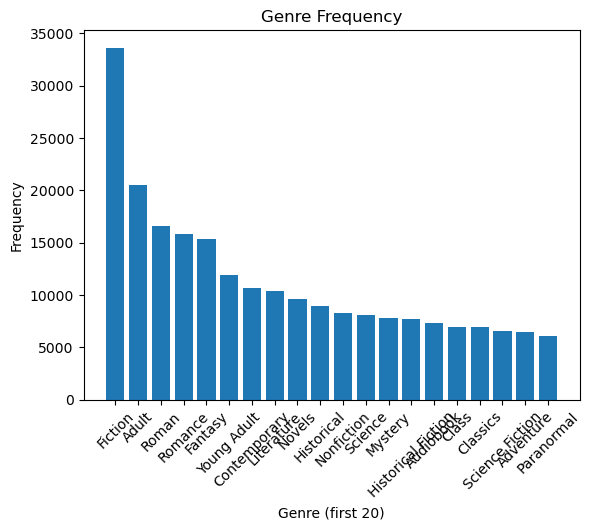

In [93]:
import matplotlib.pyplot as plt

# Sample data of genres and their frequency
genre_counts = genre_counts[:20]

# Extract the genre names and frequency values from the data
genre_names = [genre for genre, count in genre_counts]
frequency_values = [count for genre, count in genre_counts]

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(genre_names, frequency_values)

# Set the title and axis labels
ax.set_title('Genre Frequency')
ax.set_xlabel('Genre (first 20)')
ax.set_ylabel('Frequency')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [94]:
fiction_genres = [genre[0] for genre in genre_counts if 'fiction' in genre[0].lower()]

print(fiction_genres)

['Fiction', 'Nonfiction', 'Historical Fiction', 'Science Fiction']


In [95]:
gr_data['genres'][0]

"['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']"

In [96]:
# Get the genres string for the first row
genres_string = gr_data['genres'][0]

# Remove the brackets and quotes from the string
genres_cleaned = genres_string.replace("[", "").replace("]", "").replace("'", "")

# Split the string into a list of subgenres
subgenres_list = genres_cleaned.split(", ")

# Get the first subgenre from the list
first_subgenre = subgenres_list[0]

# Print the first subgenre
print(first_subgenre)


Young Adult


In [97]:
adult_genres = [genre[0] for genre in genre_counts if 'adult' in genre[0].lower()]

print(adult_genres)

['Adult', 'Young Adult']


In [98]:
romance_genres = [genre[0] for genre in genre_counts if 'romance' in genre[0].lower()]

print(romance_genres)

['Romance']


In [99]:
historical_genres = [genre[0] for genre in genre_counts if 'historic' in genre[0].lower()]

print(historical_genres)

['Historical', 'Historical Fiction']


In [100]:
# Loop through all rows of genres
for i in range(len(gr_data)):
    # Get the genres for the current row
    genres_row = gr_data['genres'][i]
    
genres

['Lds Fiction',
 ' Historical Fiction',
 ' Young Adult',
 ' Fiction',
 ' Fantasy',
 ' Lds',
 ' Historical',
 ' Romance',
 ' Adventure',
 ' Teen']

In [104]:
fiction_values = []

# Iterate through each row in the DataFrame
for index, row in gr_data.iterrows():
    # Get the list of subgenres for this row
    genres_row = row['genres']
    
    # Check if "Fiction" is in the subgenres list
    if "Fiction" in genres_row:
        # If it is, find the first instance of "Fiction" and add it to the "fiction_values" list
        for genre in genres_row:
            if genre == "Fiction":
                fiction_values.append(genre)
                # Remove the "Fiction" value from the list of subgenres
                genres_row.remove(genre)
                break
    else:
        # If "Fiction" is not in the subgenres list, add a None value to the "fiction_values" list
        fiction_values.append(None)
        
    # Update the "genres" column in the DataFrame with the updated subgenres list
    gr_data.at[index, 'genres'] = genres_row
    
# Add the "fiction" column to the DataFrame
gr_data['fiction'] = fiction_values


KeyboardInterrupt: 

In [45]:
# Define the extract_subgenres function
def extract_subgenres(genres_string):
    # Remove brackets and quotes from the string
    genres_cleaned = genres_string.replace("[","").replace("]","").replace("'","")

    # Split the string into a list of subgenres
    subgenres_list = genres_cleaned.split(",")

    # Strip leading and trailing whitespace from each subgenre
    subgenres = [genre.strip() for genre in subgenres_list]

    return subgenres

In [ ]:
import ast

# Define empty lists to store the genres and subgenres
genres_list = []
subgenres_list = []

# Loop through all rows of genres
for i in range(len(gr_data)):
    # Get the genres for the current row
    genres_row = gr_data['genres'][i]

    # Convert the string representation of the list to a list and extract the subgenres
    subgenres = extract_subgenres(genres_row)

    # Remove the square brackets and single quotes and extract the main genre
    genres_row = genres_row.replace('[','').replace(']','').replace("'",'')
    genres = genres_row.split(',')
    main_genre = genres[0].strip().title()

    # Check if the main genre is not empty and not already in the genres_list
    if main_genre and main_genre not in genres_list:
        # If it contains non-ASCII characters, skip it
        if any(ord(c) > 127 for c in main_genre):
            continue
        # If it's not in the genres_list, add it
        else:
            genres_list.append(main_genre)

    # Loop through each subgenre in the row
    for subgenre in subgenres:
        # Clean up the subgenre by removing any extra whitespace and converting to title case
        subgenre = subgenre.strip().title()
        # Check if the subgenre is not empty and not already in the subgenres_list
        if subgenre and subgenre not in subgenres_list:
            # If it contains non-ASCII characters, skip it
            if any(ord(c) > 127 for c in subgenre):
                continue
            # If it's not in the subgenres_list, add it
            else:
                subgenres_list.append(subgenre)

# Add the 'genre' and 'subgenres' columns to the Goodreads data
gr_data['genre'] = gr_data['genres'].apply(lambda x: x.split(',')[0].strip().title()[1:-1].replace("'", ""))
gr_data['subgenres'] = gr_data['genres'].apply(lambda x: extract_subgenres(x))


In [ ]:
gr_data[['genre','subgenres']]

In [ ]:
len(gr_data['genre'].unique())

In [ ]:
# Filter the DataFrame to include only rows where "historic" appears in the "subgenres" list
historic_rows = gr_data[gr_data['subgenres'].apply(lambda x: "historic" in x)]

# Display the filtered DataFrame
historic_rows


Fiction
Non-fiction
Romance
Mystery
Horror
Science Fiction
Fantasy
History
Biography
Memoir
Drama
Travel & Photography
Science
Religion
Language
Philosophy

In [ ]:
gr_data.columns

###### Book Format

In [ ]:
gr_data['book_format'].isna().sum()

In [ ]:
pd.set_option('display.max_rows', None)
len(gr_data['book_format'].value_counts(dropna=False))


In [ ]:
to_paperback = ['Mass Market Paperback', 'Trade Paperback', 'paperback', 'Mass Market', 'Perfect Paperback',
                'paper', 'capa comun', 'pasta blanda', 'mass_market', 'softcover', 'Trade paperback',
                'Softcover', 'Pocket', 'Paper Back', 'Novelty Book', 'Novel', 'Mass Market Paperback', 'Paper Back',
                'Bolsillo con sobrecubierta', 'Trade Paper', 'Fiction', 'paper book', 'Broché',
               'Capa Mole', 'Capa mole', 'Paperback ', 'Capa comum', 'Paperback (عربي-English)',
               'Mass Market Paperback','Capa mole - 15,5 x 23 x 2cm','capa mole','Pasta blanda',
                'Mass Market Paperback ', 'Paper back', 'Rústica']

gr_data['book_format'] = gr_data['book_format'].replace(to_replace=to_paperback, value='Paperback')


In [ ]:
len(gr_data['book_format'].value_counts(dropna=False))

In [ ]:
to_hardcover = ['Library Binding', 'hardcover', 'Hardback', 'Taschenbuch', 'Slipcased Hardcover',
               'Capa dura', 'Pasta dura', 'Hard Cover','hardback', 'Turtleback', 'Tankobon Hardcover',
               'Big Book','Hardcover Slipcased','hardbound','Hardcover Chapbook','Hardcover, Paper Dust Jacket',
               'Hardcover Slipcased ', 'Paperback mit Klappen','Hardcover im Schuber','Klappenbroschur']

gr_data['book_format'] = gr_data['book_format'].replace(to_replace=to_hardcover, value='Hardcover')


In [ ]:
len(gr_data['book_format'].value_counts(dropna=False))

In [ ]:
to_ebook = ['Paperback and Kindle','Paperback, eBook','Webnovel','ebook and paperback','Interactive ebook',
           'Paperback/Ebook','Kindle','Hard cover, Soft cover, e-book','Paperback, Kindle, Ebook, Audio',
           'Digital',"author's website",'Online Fiction - Complete','kindle_edition','web','PDF',
           'Paperback/Kindle','Softcover, free ebook','online fiction','Online Fiction','Webtoon',
           'eBook Kindle','Wattpad','Online','Ebook_Online','Nook','ebook','Kindle Edition', 'Poche']

gr_data['book_format'] = gr_data['book_format'].replace(to_replace=to_ebook, value='Ebook_Online')

In [ ]:
len(gr_data['book_format'].value_counts(dropna=False))

In [ ]:
to_audio = ['Audio Play','audiobook','Audio Cd','audio cassette','Audio Book','CD-ROM',
           'MP3 CD','Audible Audio','Audio Cassette','Audiobook','Audio CD']

gr_data['book_format'] = gr_data['book_format'].replace(to_replace=to_audio, value='Audio')

In [ ]:
len(gr_data['book_format'].value_counts(dropna=False))

In [ ]:
to_boxset = ['Hardcover Boxed Set','Box-Set', 'Book Set', 'Box Set','Boxed Set']

gr_data['book_format'] = gr_data['book_format'].replace(to_replace=to_boxset, value='Boxset')

In [ ]:
len(gr_data['book_format'].value_counts(dropna=False))

In [ ]:
to_graphic = ['Comics', 'Digital Comic','webtoon','Graphic Novels', 'Comic']

gr_data['book_format'] = gr_data['book_format'].replace(to_replace=to_graphic, value='Comic & Graphic Novel')

In [ ]:
len(gr_data['book_format'].value_counts(dropna=False))

In [ ]:
to_boardbook = ['Board book', 'Board']

gr_data['book_format'] = gr_data['book_format'].replace(to_replace=to_boardbook, value='Board Book')

In [ ]:
len(gr_data['book_format'].value_counts(dropna=False))

In [ ]:
to_specialed = ['Leather Bound','cloth','Broschiert','Bonded Leather','Gebunden','revised edition','Gebundene Ausgabe']

gr_data['book_format'] = gr_data['book_format'].replace(to_replace=to_specialed, value='Special Edition')

In [ ]:
len(gr_data['book_format'].value_counts(dropna=False))

In [ ]:
# Replacing all other formats to 'Other formats'
to_other_format = [f for f in gr_data['book_format'].unique() if f not in ['Paperback', 'Hardcover','Ebook_Online', 'Audio', 'Board Book', 'Special Edition', 'Comic & Graphic Novel', 'Boxset']]

gr_data['book_format'] = gr_data['book_format'].replace(to_replace=to_other_format, value='Other Format')

In [ ]:
display(gr_data['book_format'].value_counts(dropna=False))
len(gr_data['book_format'].value_counts(dropna=False))

In [ ]:
# Checking NaN Values
gr_data['book_format'].isna().sum()

In [ ]:
gr_data.columns

###### Characters

###### Edition

In [ ]:
gr_data.tail()

In [ ]:
len(gr_data['edition'].value_counts())

In [ ]:
gr_data['edition'].nunique()

In [ ]:
# Dealing with 'First Edition' multiple descriptions

# Replace NaNs in the 'edition' column with an empty string
gr_data['edition'] = gr_data['edition'].fillna('')

# Select all rows where the 'edition' column contains 'First', 'first', or '1st'
first_edition_rows = gr_data[gr_data['edition'].str.contains('first|1st|1 edition|primera', case=False, na=False)]

# Replace the 'edition' column for the selected rows with 'First Edition'
gr_data.loc[first_edition_rows.index, 'edition'] = 'First Edition'

# Unique values
gr_data['edition'].nunique()

In [ ]:
# Dealing with editions 2-5

# Select all rows for 'edition' 2 to 5
second_edition_rows = gr_data[gr_data['edition'].str.contains('second|2nd|segunda', case=False, na=False)]
third_edition_rows = gr_data[gr_data['edition'].str.contains('third|3rd|tercera', case=False, na=False)]
fourth_edition_rows = gr_data[gr_data['edition'].str.contains('fourth|4th|cuarta', case=False, na=False)]
fifth_edition_rows = gr_data[gr_data['edition'].str.contains('fifth|5th|quinta', case=False, na=False)]

# Replacing the 'edition' column 
gr_data.loc[second_edition_rows.index, 'edition'] = 'Second Edition'
gr_data.loc[third_edition_rows.index, 'edition'] = 'Third Edition'
gr_data.loc[fourth_edition_rows.index, 'edition'] = 'Fourth Edition'
gr_data.loc[fifth_edition_rows.index, 'edition'] = 'Fifth Edition'

# Unique values
gr_data['edition'].nunique()

In [ ]:
# Special editions

# Select all rows where the 'edition' column contains 'Anniversary' or 'anniversary'
anniversary_rows = gr_data[gr_data['edition'].str.contains('anniversary|deluxe edition|limited|special|commemorativa', case=False, na=False)]

# Replace the 'edition' column for the selected rows with 'Special Edition'
gr_data.loc[anniversary_rows.index, 'edition'] = 'Special Edition'


In [ ]:
gr_data['edition'].nunique()

In [ ]:
# Other cases of editions
revised_rows = gr_data[gr_data['edition'].str.contains('revised', case=False, na=False)]
gr_data.loc[revised_rows.index, 'edition'] = 'Revised Edition'

illustrated_rows = gr_data[gr_data['edition'].str.contains('illustrated', case=False, na=False)]
gr_data.loc[illustrated_rows.index, 'edition'] = 'Illustrated Edition'

comic_graphic_rows = gr_data[gr_data['edition'].str.contains('comic|graphic', case=False, na=False)]
gr_data.loc[comic_graphic_rows.index, 'edition'] = 'Comic&Graphic Novel'

classic_rows = gr_data[gr_data['edition'].str.contains('classic|Agatha|Shakespeare|Larousse|clásico', case=False, na=False)]
gr_data.loc[classic_rows.index, 'edition'] = 'Classic Collection'

updated_rows = gr_data[gr_data['edition'].str.contains('expanded|extended|updated', case=False, na=False)]
gr_data.loc[updated_rows.index, 'edition'] = 'Extended-Updated Edition'

boxed_rows = gr_data[gr_data['edition'].str.contains('box|boxed|box |set', case=False, na=False)]
gr_data.loc[boxed_rows.index, 'edition'] = 'Boxed Set'



gr_data['edition'].nunique()

In [ ]:
#gr_data['edition'].value_counts()

In [ ]:
gr_data['edition'].unique()

# Define expected edition values
new_ed = ['First Edition', 'Second Edition', 'Third Edition', 'Fourth Edition', 'Fifth Edition',
          'Special Edition', 'Revised Edition', 'Illustrated Edition', 'Graphic Novel Edition',
          'Classic Edition', 'Extended-Updated Edition', 'Boxed Set']

# Replace unexpected edition values with 'Other Format'
gr_data.loc[~gr_data['edition'].isin(new_ed), 'edition'] = 'Other Format'

display(gr_data['edition'].value_counts())
len(gr_data['edition'].value_counts())

In [ ]:
gr_data['edition'].value_counts()

In [ ]:
gr_data.columns

###### Pages

In [ ]:
gr_data['pages'].isna().sum()

In [ ]:
nan_pages = gr_data[gr_data['pages'].isna()]
display(nan_pages)


###### Ratings by stars

In [ ]:
# Number of ratings by stars (from 5 to 1 star)
gr_data['rating_by_stars']

In [ ]:
gr_data['rating_by_stars'][0]

In [ ]:
print(type(gr_data['rating_by_stars'][0]))

In [ ]:
import ast
gr_data['rating_by_stars'] = gr_data['rating_by_stars'].apply(ast.literal_eval)
print(type(gr_data['rating_by_stars'][0]))

In [ ]:
# Creating columns (5 to 1 stars) to add the count of rates for each 
gr_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings', '2_stars_num_ratings', '1_star_num_ratings']] = gr_data['rating_by_stars'].apply(lambda x: pd.Series({
    '5_stars_num_ratings': x[0] if len(x) > 0 else None,
    '4_stars_num_ratings': x[1] if len(x) > 1 else None,
    '3_stars_num_ratings': x[2] if len(x) > 2 else None,
    '2_stars_num_ratings': x[3] if len(x) > 3 else None,
    '1_star_num_ratings': x[4] if len(x) > 4 else None
}))

In [ ]:
# Droping original 'rating-by-stars' column
gr_data = gr_data.drop(['rating_by_stars'], axis = 1)

In [ ]:
display(gr_data.head(), gr_data.shape)

###### ISBN

In [ ]:
gr_data['isbn']

In [ ]:
for value in gr_data['isbn']:
    try:
        float(value)
    except ValueError:
        print(f"Value {value} could not be converted to a float")

In [ ]:
gr_data.head()

In [ ]:
isbn = int(float('9.78044E+12'))
print(isbn)


In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import random

def extract_isbn(row):
    # Check if the isbn column contains a string in scientific notation format
    try:
        isbn_num = int(row['isbn'])
        isbn_str = str(isbn_num)
        if len(isbn_str) == 10 or len(isbn_str) == 13:
            return isbn_str
    except ValueError:
        pass
    
    # If the isbn column does not contain a valid ISBN, extract it from the Amazon product page
    amazon_id = row['isbn']
    url = f'https://www.amazon.com/dp/{amazon_id}'
    response = requests.get(url)
    
    # Sleep for a random time between 1 and 3 seconds
    time.sleep(random.uniform(1, 3))
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
    isbn_tags = soup.select('#detailBullets_feature_div li:-soup-contains("ISBN-10") span.a-text-bold, #detailBullets_feature_div li:-soup-contains("ISBN-13") span.a-text-bold')
    if isbn_tags:
        return isbn_tags[0].text.strip().replace('-', '')
    else:
        return None


In [ ]:
#gr_data['isbn'] = gr_data.apply(extract_isbn, axis=1)

In [ ]:
gr_data['isbn']